<a href="https://colab.research.google.com/github/Jurgo001/TH_TriTueNhanTao/blob/main/Buoi05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- I. TẠO DỮ LIỆU BAN ĐẦU ---
--- DỮ LIỆU KHỞI TẠO ---


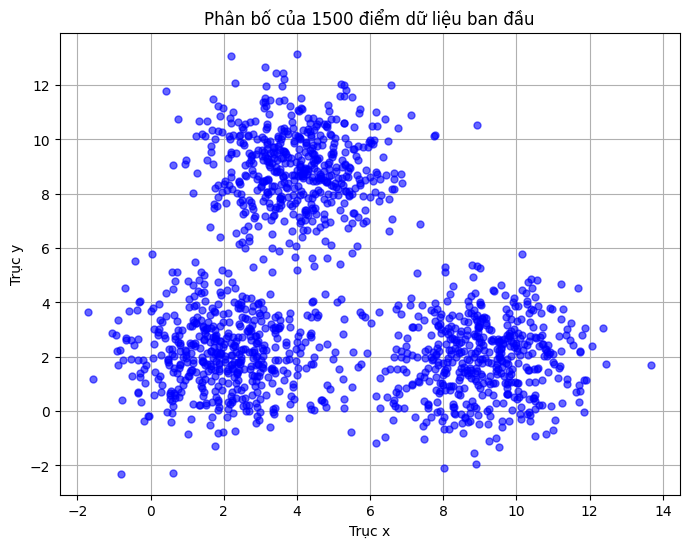

--- IV. THỰC THI VÀ KẾT QUẢ ---
Tọa độ khởi tạo ngẫu nhiên của các tâm cụm:
 [[4.81466495 8.46825512]
 [0.99593472 1.79002558]
 [1.43380088 0.53378792]]


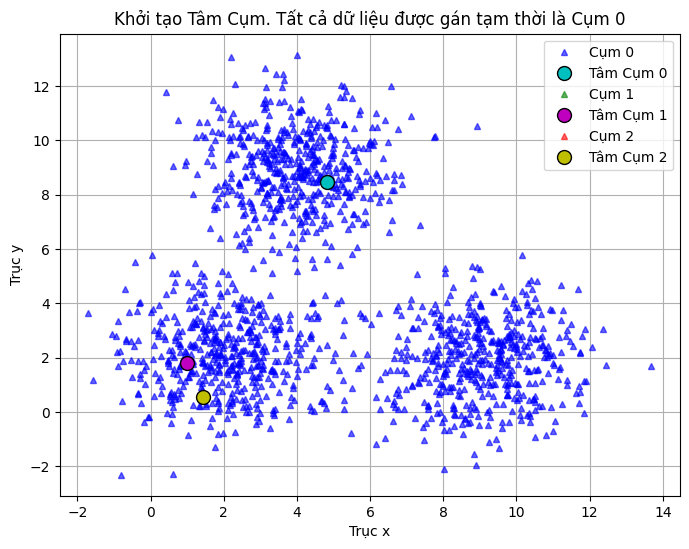


--- III. QUÁ TRÌNH LẶP K-MEANS ---


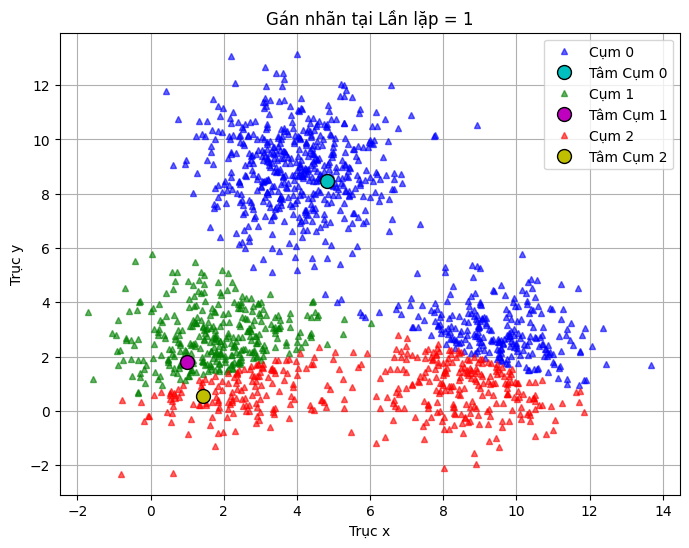

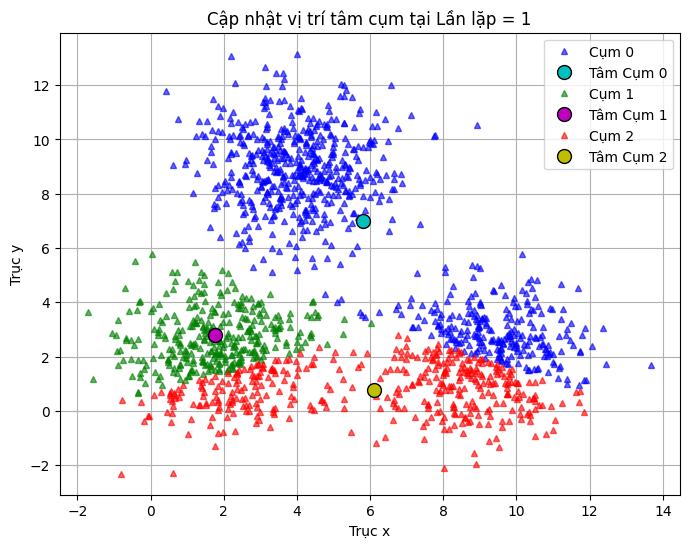

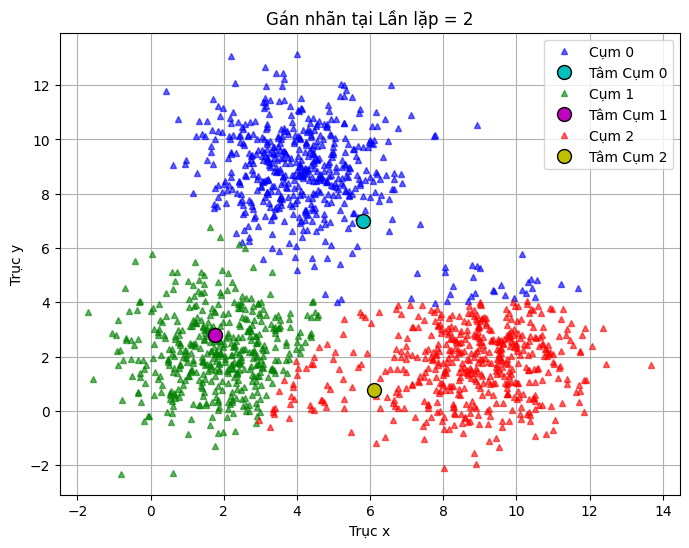

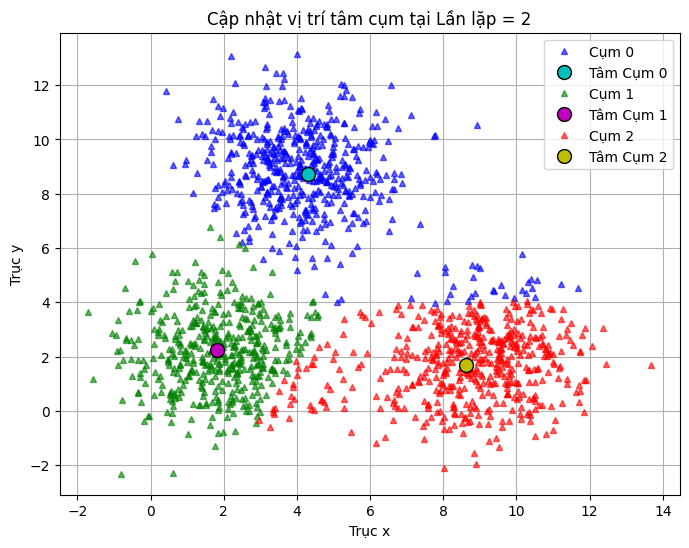

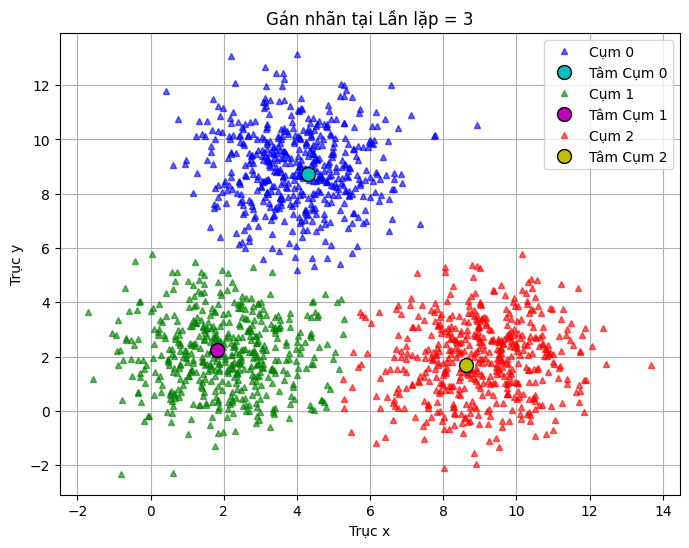

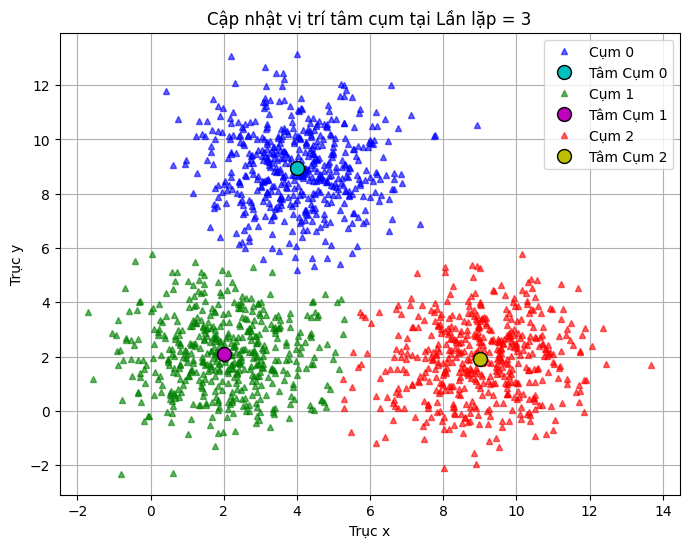

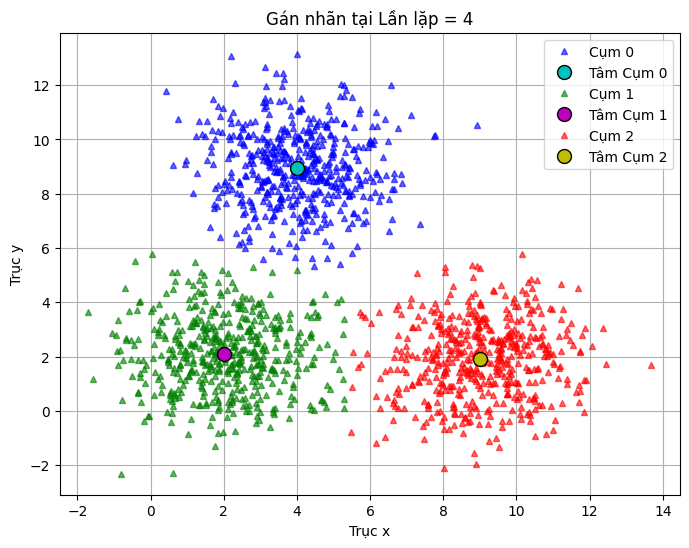

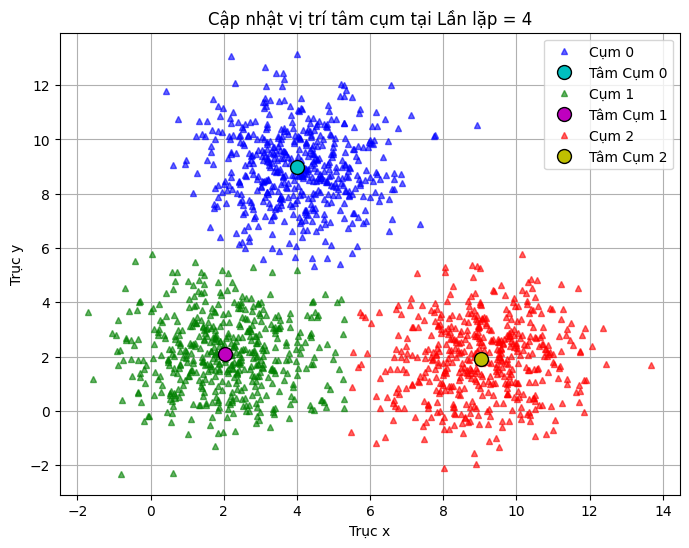

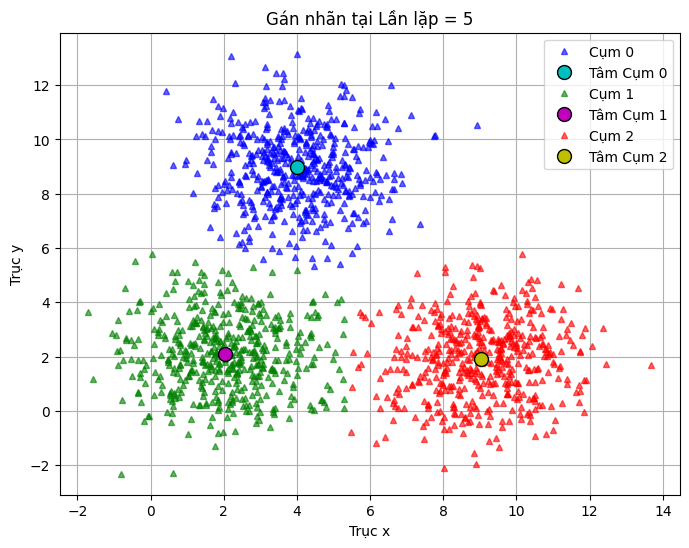


Hoàn thành! K-Means đã hội tụ sau 4 lần lặp.
Tọa độ Tâm cụm cuối cùng:
 [[3.98979378 8.96690884]
 [2.02250807 2.11072623]
 [9.01928455 1.92180925]]


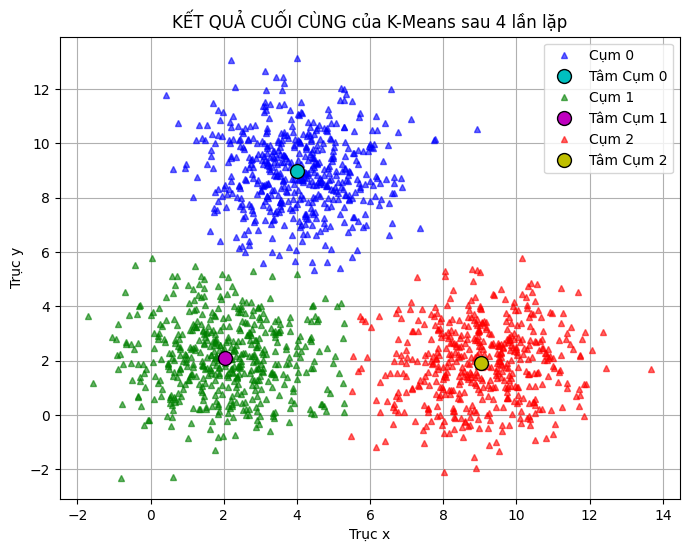

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# --- I. KHỐI TẠO DỮ LIỆU ---

print("--- I. TẠO DỮ LIỆU BAN ĐẦU ---")

# Tham số khởi tạo
tam_ly_tuong = [[2, 2], [9, 2], [4, 9]] # Tọa độ 3 tâm cụm lý tưởng
ma_tran_hiep_phuong_sai = [[2, 0], [0, 2]]
so_mau_moi_cum = 500
so_cum = 3

# Tạo dữ liệu
X0 = np.random.multivariate_normal(tam_ly_tuong[0], ma_tran_hiep_phuong_sai, so_mau_moi_cum)
X1 = np.random.multivariate_normal(tam_ly_tuong[1], ma_tran_hiep_phuong_sai, so_mau_moi_cum)
X2 = np.random.multivariate_normal(tam_ly_tuong[2], ma_tran_hiep_phuong_sai, so_mau_moi_cum)

# Tập dữ liệu chung
DuLieu = np.concatenate((X0, X1, X2), axis=0)

# Trực quan hóa dữ liệu ban đầu
print("--- DỮ LIỆU KHỞI TẠO ---")
plt.figure(figsize=(8, 6))
plt.xlabel('Trục x')
plt.ylabel('Trục y')
plt.title('Phân bố của 1500 điểm dữ liệu ban đầu')
plt.plot(DuLieu[:, 0], DuLieu[:, 1], 'bo', markersize=5, alpha=0.6)
plt.grid(True)
plt.show()

# --- II. CÁC HÀM CỦA THUẬT TOÁN K-MEANS ---

def khoi_tao_tam_cum(DuLieu, so_cum):
    """Chọn ngẫu nhiên so_cum tâm cụm từ tập dữ liệu."""
    return DuLieu[np.random.choice(DuLieu.shape[0], so_cum, replace=False)]

def gan_nhan(DuLieu, tam_cum):
    """Gán nhãn cho từng điểm dữ liệu dựa trên tâm cụm gần nhất (E-Step)."""
    KhoangCach = cdist(DuLieu, tam_cum)
    return np.argmin(KhoangCach, axis=1)

def cap_nhat_tam_cum(DuLieu, nhan, so_cum):
    """Tính toán lại vị trí mới của tâm cụm (M-Step)."""
    tam_moi = np.zeros((so_cum, DuLieu.shape[1]))
    for k in range(so_cum):
        DuLieu_k = DuLieu[nhan == k, :]
        if len(DuLieu_k) > 0:
            tam_moi[k, :] = np.mean(DuLieu_k, axis=0)
    return tam_moi

def kiem_tra_hoi_tu(tam_cum_cu, tam_cum_moi):
    """Kiểm tra xem hai bộ tâm cụm có giống nhau không."""
    return (set([tuple(a) for a in tam_cum_cu]) ==
            set([tuple(a) for a in tam_cum_moi]))

def truc_quan_hoa(DuLieu, tam_cum, nhan, so_cum, tieu_de):
    """Vẽ dữ liệu (theo cụm) và tâm cụm lên đồ thị."""
    mau_sac = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    plt.figure(figsize=(8, 6))
    plt.xlabel('Trục x')
    plt.ylabel('Trục y')
    plt.title(tieu_de)

    for i in range(so_cum):
        du_lieu_cum_i = DuLieu[nhan == i]
        # Vẽ điểm dữ liệu
        plt.plot(du_lieu_cum_i[:, 0], du_lieu_cum_i[:, 1], mau_sac[i] + '^', markersize=4,
                 alpha=0.6, label='Cụm ' + str(i))

        # Vẽ tâm cụm
        plt.plot(tam_cum[i][0], tam_cum[i][1], mau_sac[(i + so_cum) % len(mau_sac)] + 'o',
                 markersize=10, markeredgecolor='black',
                 label='Tâm Cụm ' + str(i))

    plt.legend()
    plt.grid(True)
    plt.show()

def k_means(tam_khoi_tao, nhan_khoi_tao, DuLieu, so_cum):
    """Thực thi thuật toán K-Means lặp lại cho đến khi hội tụ."""
    tam_hien_tai = tam_khoi_tao
    nhan_hien_tai = nhan_khoi_tao
    so_lan_lap = 0

    print("\n--- III. QUÁ TRÌNH LẶP K-MEANS ---")

    while True:
        # 1. Gán nhãn (E-step)
        nhan_hien_tai = gan_nhan(DuLieu, tam_hien_tai)
        truc_quan_hoa(DuLieu, tam_hien_tai, nhan_hien_tai, so_cum,
                         'Gán nhãn tại Lần lặp = ' + str(so_lan_lap + 1))

        # 2. Cập nhật tâm cụm (M-step)
        tam_moi = cap_nhat_tam_cum(DuLieu, nhan_hien_tai, so_cum)

        # 3. Kiểm tra hội tụ
        if kiem_tra_hoi_tu(tam_hien_tai, tam_moi):
            break

        # 4. Cập nhật và trực quan hóa vị trí tâm cụm mới
        tam_hien_tai = tam_moi
        truc_quan_hoa(DuLieu, tam_hien_tai, nhan_hien_tai, so_cum,
                         'Cập nhật vị trí tâm cụm tại Lần lặp = ' + str(so_lan_lap + 1))

        so_lan_lap += 1

    return (tam_hien_tai, nhan_hien_tai, so_lan_lap)

# --- III. THỰC THI CHÍNH ---

print("--- IV. THỰC THI VÀ KẾT QUẢ ---")

# 1. Khởi tạo
tam_khoi_tao = khoi_tao_tam_cum(DuLieu, so_cum)
print("Tọa độ khởi tạo ngẫu nhiên của các tâm cụm:\n", tam_khoi_tao)

# 2. Khởi tạo nhãn và trực quan hóa bước đầu tiên
nhan_khoi_tao = np.zeros(DuLieu.shape[0])
truc_quan_hoa(DuLieu, tam_khoi_tao, nhan_khoi_tao, so_cum,
                 'Khởi tạo Tâm Cụm. Tất cả dữ liệu được gán tạm thời là Cụm 0')


# 3. Chạy thuật toán
tam_cuoi, nhan_cuoi, so_lan_lap_cuoi = k_means(tam_khoi_tao, nhan_khoi_tao, DuLieu, so_cum)

# 4. In và trực quan hóa kết quả cuối cùng
print('\nHoàn thành! K-Means đã hội tụ sau', so_lan_lap_cuoi, 'lần lặp.')
print('Tọa độ Tâm cụm cuối cùng:\n', tam_cuoi)

truc_quan_hoa(DuLieu, tam_cuoi, nhan_cuoi, so_cum,
                 'KẾT QUẢ CUỐI CÙNG của K-Means sau ' + str(so_lan_lap_cuoi) + ' lần lặp')

--- I. TẠO VÀ XEM DỮ LIỆU BAN ĐẦU ---


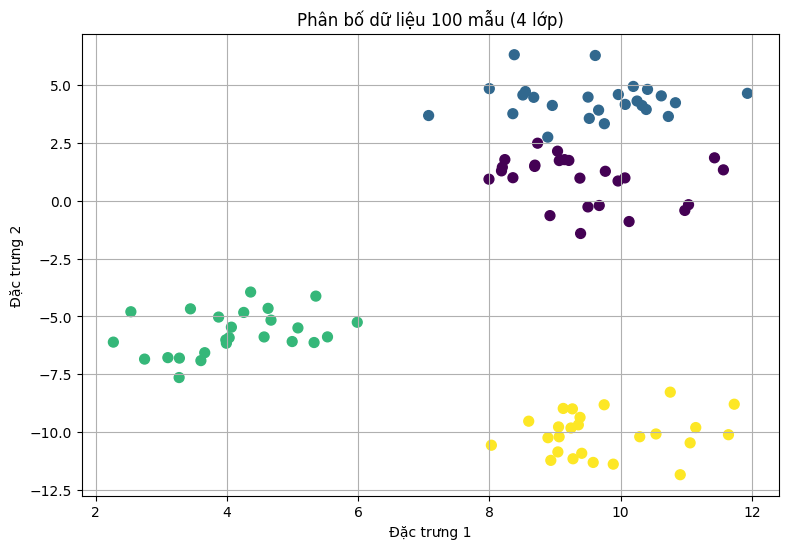


--- II. ĐÁNH GIÁ K BẰNG HÌNH ẢNH ---
Kích thước tập huấn luyện: 75 mẫu
Kích thước tập kiểm tra: 25 mẫu


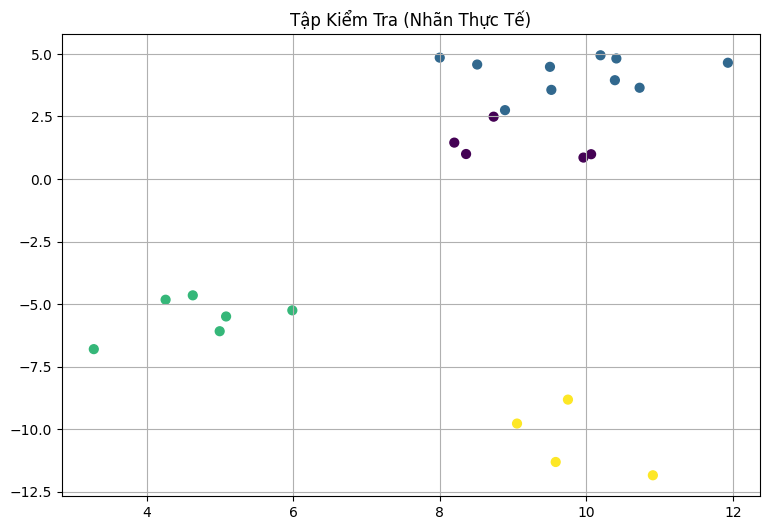


--- DỰ ĐOÁN VỚI K = 5 ---


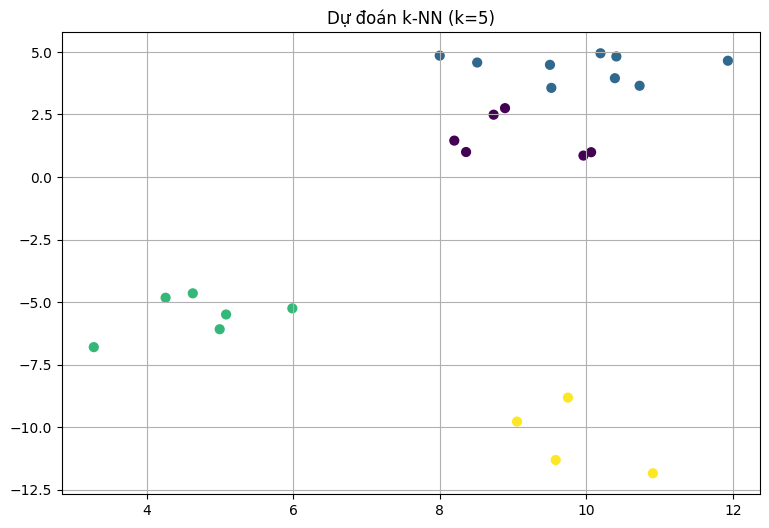

Độ chính xác của k=5 là: 0.9600

--- DỰ ĐOÁN VỚI K = 1 ---


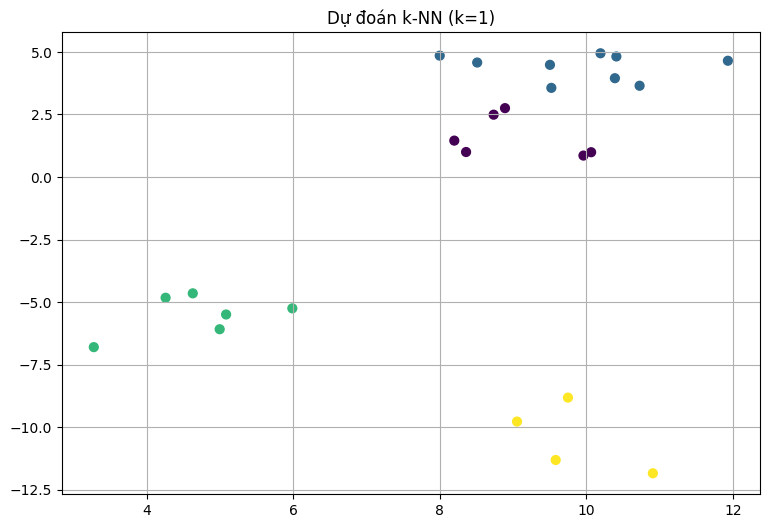

Độ chính xác của k=1 là: 0.9600

--- III. TÌM K TỐI ƯU BẰNG GRID SEARCH ---
Giá trị k tối ưu được tìm thấy: 2
Độ chính xác tốt nhất (tương ứng với k tối ưu): 0.9900

--- IV. HÀM K-NN THỦ CÔNG ---

Điểm kiểm tra: [1 3]
Giá trị k tối ưu được sử dụng: 2
Nhãn dự đoán cho điểm dữ liệu mới là: 0


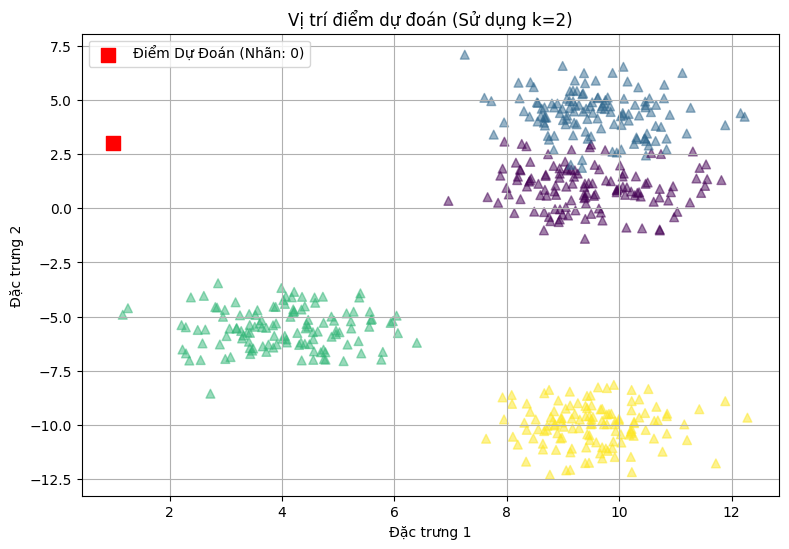

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
# Thư viện Scikit-learn
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# --- I. KHỞI TẠO VÀ TRỰC QUAN HÓA DỮ LIỆU BAN ĐẦU ---

print("--- I. TẠO VÀ XEM DỮ LIỆU BAN ĐẦU ---")

# Tạo tập dữ liệu tổng hợp (100 mẫu, 2 đặc trưng, 4 lớp)
DuLieu_X, Nhãn_y = make_blobs(n_samples=100, n_features=2, centers=4,
                             cluster_std=1, random_state=4)

# Trực quan hóa phân bố dữ liệu
plt.figure(figsize=(9, 6))
plt.scatter(DuLieu_X[:, 0], DuLieu_X[:, 1], c=Nhãn_y, marker='o', s=50, cmap='viridis')
plt.title('Phân bố dữ liệu 100 mẫu (4 lớp)')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.grid(True)
plt.show()


# --- II. ĐÁNH GIÁ K-NN BẰNG PHƯƠNG PHÁP NHÌN HÌNH (k=5 và k=1) ---

print("\n--- II. ĐÁNH GIÁ K BẰNG HÌNH ẢNH ---")

# 1. Chia tập dữ liệu (75% Huấn luyện, 25% Kiểm tra)
X_HuanLuyen, X_KiemTra, y_HuanLuyen, y_KiemTra = train_test_split(DuLieu_X, Nhãn_y, test_size=0.25, random_state=0)

print(f"Kích thước tập huấn luyện: {X_HuanLuyen.shape[0]} mẫu")
print(f"Kích thước tập kiểm tra: {X_KiemTra.shape[0]} mẫu")

# Trực quan hóa tập kiểm tra (Nhãn thực tế)
plt.figure(figsize=(9, 6))
plt.scatter(X_KiemTra[:, 0], X_KiemTra[:, 1], c=y_KiemTra, marker='o', s=40, cmap='viridis')
plt.title('Tập Kiểm Tra (Nhãn Thực Tế)')
plt.grid(True)
plt.show()

# 2. Huấn luyện và dự đoán với k=5
print("\n--- DỰ ĐOÁN VỚI K = 5 ---")
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_HuanLuyen, y_HuanLuyen)
y_DuDoan_5 = knn5.predict(X_KiemTra)

# Trực quan hóa kết quả dự đoán với k=5
plt.figure(figsize=(9, 6))
plt.scatter(X_KiemTra[:, 0], X_KiemTra[:, 1], c=y_DuDoan_5, marker='o', s=40, cmap='viridis')
plt.title('Dự đoán k-NN (k=5)')
plt.grid(True)
plt.show()
print(f"Độ chính xác của k=5 là: {knn5.score(X_KiemTra, y_KiemTra):.4f}")

# 3. Huấn luyện và dự đoán với k=1
print("\n--- DỰ ĐOÁN VỚI K = 1 ---")
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_HuanLuyen, y_HuanLuyen)
y_DuDoan_1 = knn1.predict(X_KiemTra)

# Trực quan hóa kết quả dự đoán với k=1
plt.figure(figsize=(9, 6))
plt.scatter(X_KiemTra[:, 0], X_KiemTra[:, 1], c=y_DuDoan_1, marker='o', s=40, cmap='viridis')
plt.title('Dự đoán k-NN (k=1)')
plt.grid(True)
plt.show()
print(f"Độ chính xác của k=1 là: {knn1.score(X_KiemTra, y_KiemTra):.4f}")

# --- III. TÌM K TỐI ƯU BẰNG GRID SEARCH (Kiểm tra tự động) ---

print("\n--- III. TÌM K TỐI ƯU BẰNG GRID SEARCH ---")

# Định nghĩa Grid Search để kiểm tra k từ 1 đến 9 với Kiểm định chéo (CV) là 5
knn_tim_k = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1, 10)},
                        cv=5)

# Huấn luyện trên toàn bộ dữ liệu
knn_tim_k.fit(DuLieu_X, Nhãn_y)

print("Giá trị k tối ưu được tìm thấy:", knn_tim_k.best_params_['n_neighbors'])
print(f"Độ chính xác tốt nhất (tương ứng với k tối ưu): {knn_tim_k.best_score_:.4f}")
k_toi_uu = knn_tim_k.best_params_['n_neighbors']

# --- IV. HÀM K-NN THỦ CÔNG VÀ KIỂM TRA ---

print("\n--- IV. HÀM K-NN THỦ CÔNG ---")

def PhanLoai_KNN(X_HuanLuyen, X_KiemTra, y_HuanLuyen, k):
    """Thực hiện phân loại k-NN thủ công (tính khoảng cách và bầu chọn)."""
    so_mau_kiem_tra = X_KiemTra.shape[0]
    nhan_du_doan = []

    for i in range(so_mau_kiem_tra):
        distances = []
        # 1. Tính khoảng cách Euclidean đến mọi điểm huấn luyện
        for j in range(X_HuanLuyen.shape[0]):
            dist = np.sqrt(np.sum(np.power(X_KiemTra[i, :] - X_HuanLuyen[j, :], 2)))
            distances.append((dist, y_HuanLuyen[j]))

        # 2. Sắp xếp và chọn k hàng xóm gần nhất
        distances.sort(key=lambda x: x[0])
        top_k_hang_xom = distances[:k]

        # 3. Bầu chọn lớp
        dem_lop = {}
        for _, nhan in top_k_hang_xom:
            nhan = int(nhan)
            dem_lop[nhan] = dem_lop.get(nhan, 0) + 1

        # Chọn lớp có số phiếu bầu cao nhất
        nhan_du_doan.append(max(dem_lop, key=dem_lop.get))

    return np.array(nhan_du_doan)

# --- Kiểm tra với K tối ưu ---
# Tạo tập dữ liệu huấn luyện lớn hơn để kiểm tra hàm thủ công
X_lon, y_lon = make_blobs(n_samples=500, n_features=2, centers=4,
                          cluster_std=1, random_state=4)

# Điểm dữ liệu mới cần dự đoán
Diem_Moi = np.array([(1, 3)])

# Thực hiện dự đoán
ket_qua = PhanLoai_KNN(X_lon, Diem_Moi, y_lon, k=k_toi_uu)

print(f"\nĐiểm kiểm tra: {Diem_Moi[0]}")
print(f"Giá trị k tối ưu được sử dụng: {k_toi_uu}")
print("Nhãn dự đoán cho điểm dữ liệu mới là:", ket_qua[0])

# Trực quan hóa điểm dự đoán
plt.figure(figsize=(9, 6))
plt.scatter(X_lon[:, 0], X_lon[:, 1], c=y_lon, marker='^', s=40, alpha=0.5, cmap='viridis')
plt.scatter(Diem_Moi[:, 0], Diem_Moi[:, 1], c='red', marker='s', s=100, label=f'Điểm Dự Đoán (Nhãn: {ket_qua[0]})')
plt.title(f'Vị trí điểm dự đoán (Sử dụng k={k_toi_uu})')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend()
plt.grid(True)
plt.show()